# DATA PREPROCESSING

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
data = pd.read_csv('House_price.csv', header=0)

In [3]:
data.head(5)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


# Handling Missing Values

In [4]:
data.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [5]:
data['n_hos_beds'] = data['n_hos_beds'].fillna(data['n_hos_beds'].mean())

## Extended Data Dictionary (EDD)

In [6]:
data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [7]:
data_n = data.drop(['price'], axis=1).copy()

### Numerical Features

In [8]:
num = [f for f in data_n if data_n[f].dtypes !='O']
num

['crime_rate',
 'resid_area',
 'air_qual',
 'room_num',
 'age',
 'dist1',
 'dist2',
 'dist3',
 'dist4',
 'teachers',
 'poor_prop',
 'n_hos_beds',
 'n_hot_rooms',
 'rainfall',
 'parks']

### Categorical Features

In [9]:
cat = [f for f in data_n if data_n[f].dtypes =='O']
cat

['airport', 'waterbody', 'bus_ter']

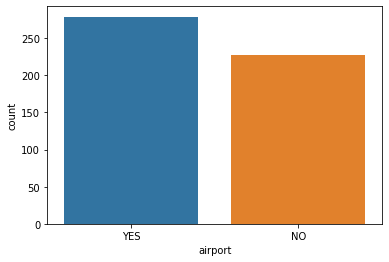

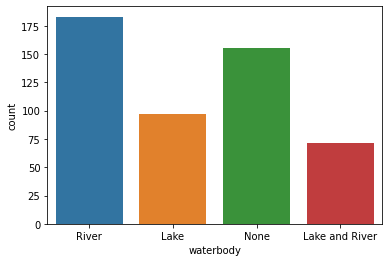

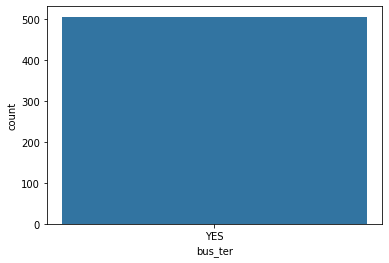

In [10]:
for f in cat:
    dataC = data_n.copy()
    sns.countplot(data[f])
    plt.show()

In [11]:
del data['bus_ter']

* bus_ter feature is of no use as it only has one value in it

# Outlier Detection

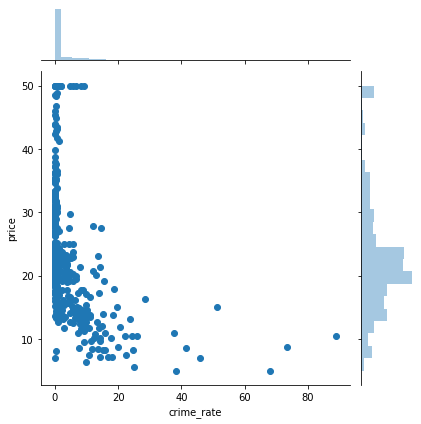

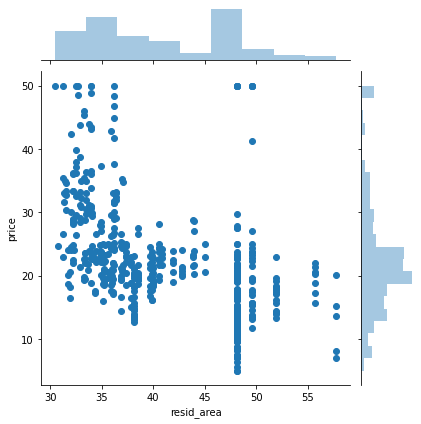

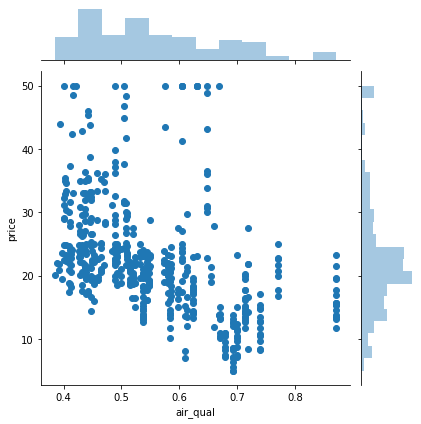

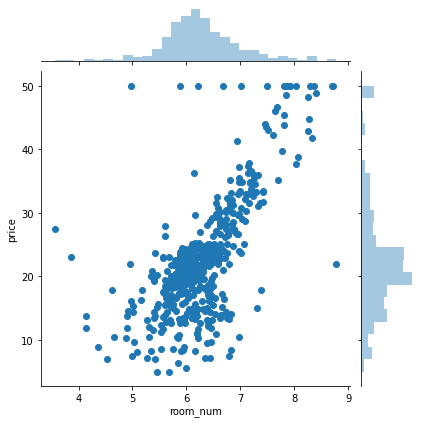

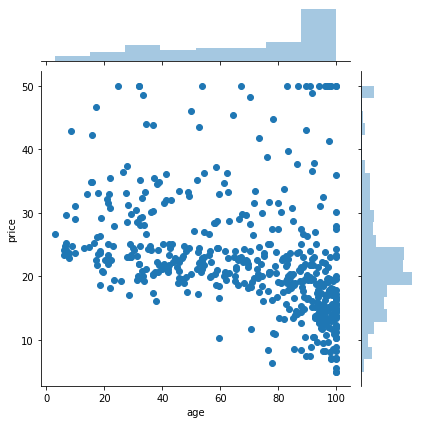

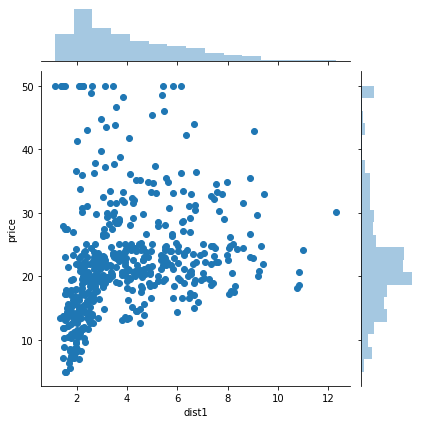

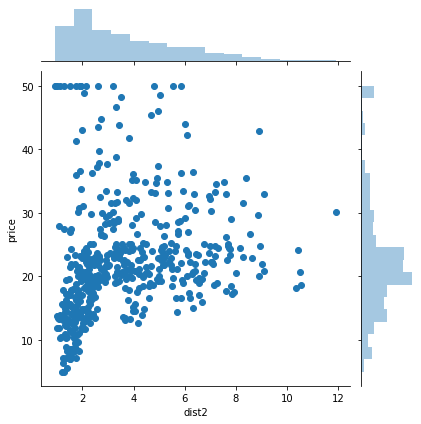

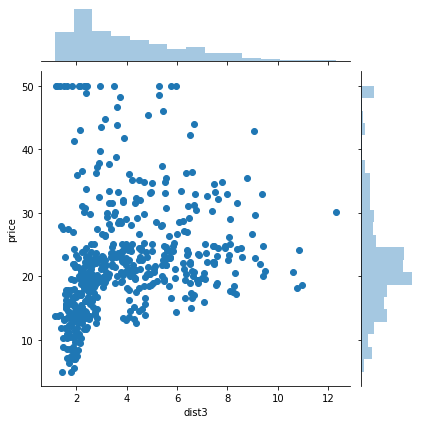

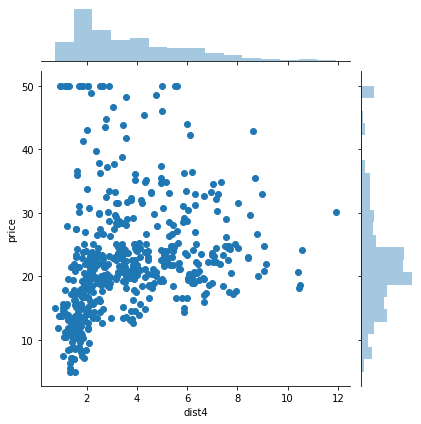

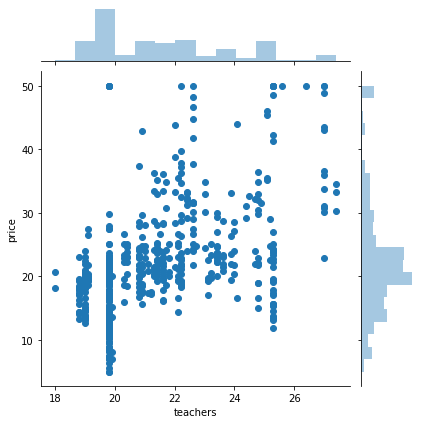

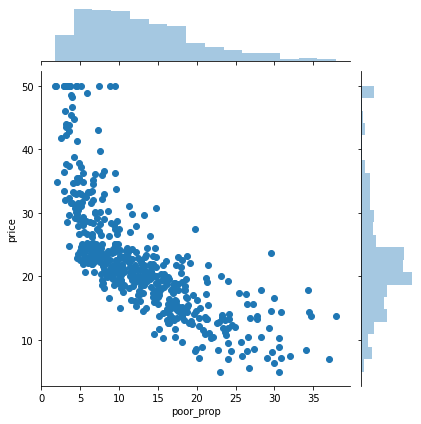

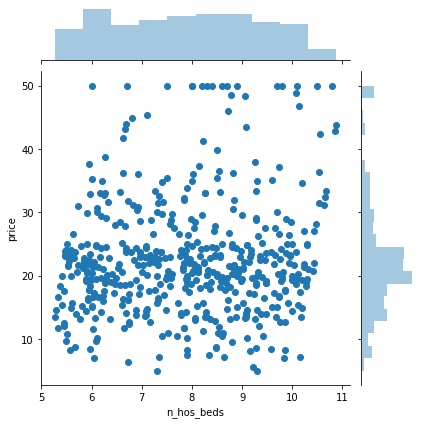

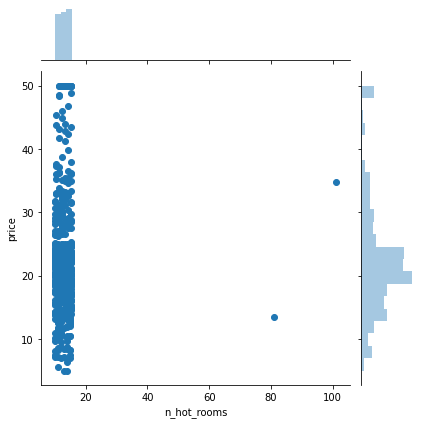

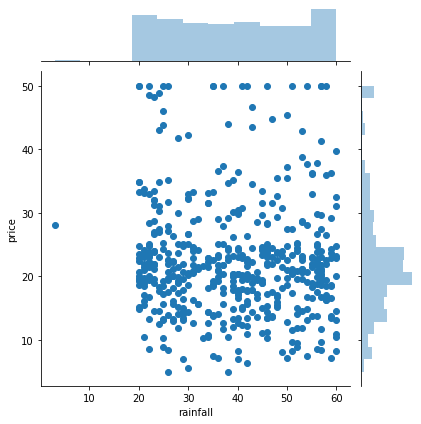

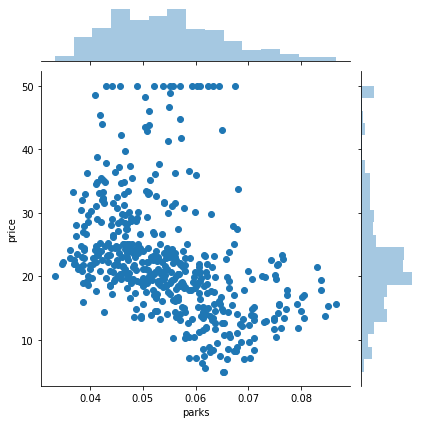

In [12]:
for f in num:
    dataC = data_n.copy()
    sns.jointplot(dataC[f], y=data['price'])
    plt.show()

* n_hos_beds has missing values
* n_hot_rooms has outliears
* rainfall has outliear

# Outlier Treatment

### Using Capping and Flooring

In [13]:
room_99 = np.percentile(data['n_hot_rooms'],99)
room_99

15.399519999999999

In [14]:
data[data['n_hot_rooms']>room_99]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,0.063344


* we can see in n_hot_rooms 2 outliers 101.12 and 81.12

In [15]:
data.n_hot_rooms[data['n_hot_rooms']>room_99*2 ]= room_99*2

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
data[data['n_hot_rooms']>room_99]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,30.79904,None,38,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,30.79904,Lake,29,0.063344


In [17]:
rainfall = np.percentile(data['rainfall'], 1)
rainfall

20.0

In [18]:
data[data['rainfall']<rainfall]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,0.044019


In [19]:
data.rainfall[data['rainfall']<rainfall*0.3] = rainfall*0.3

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
data[data['rainfall']<rainfall]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,0.044019


# Determine Skewed Features

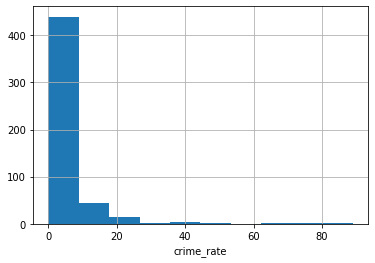

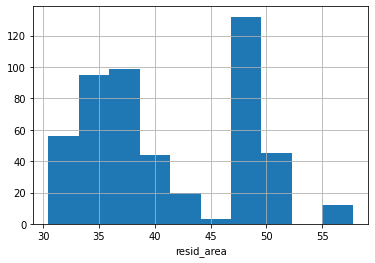

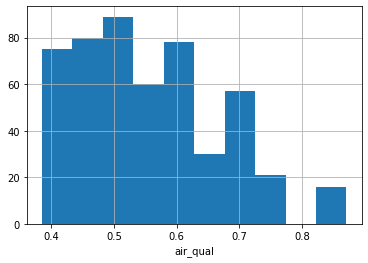

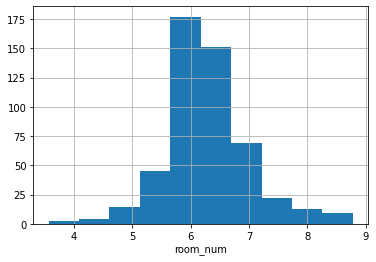

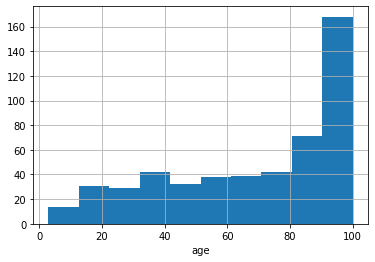

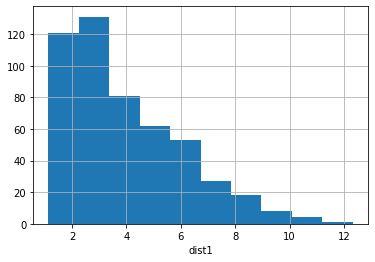

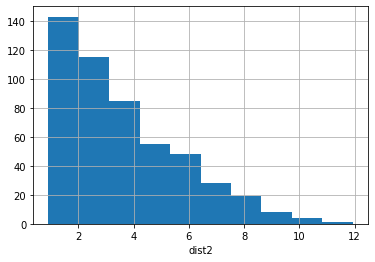

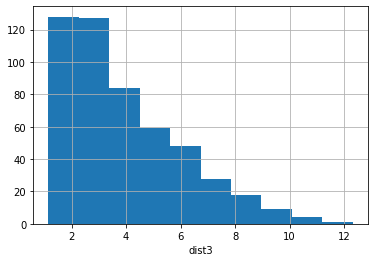

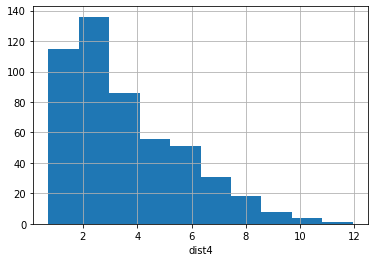

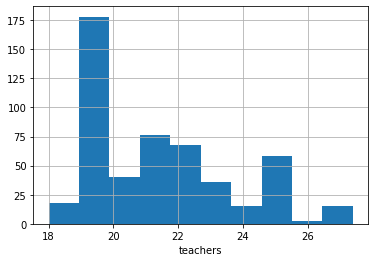

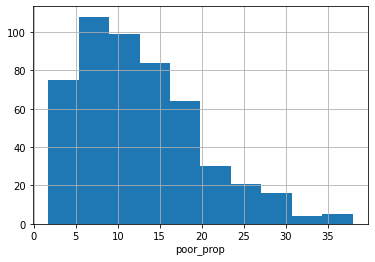

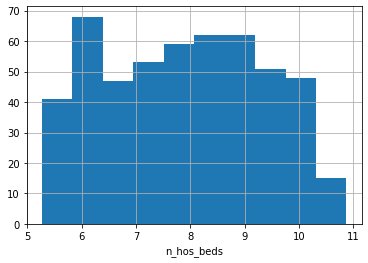

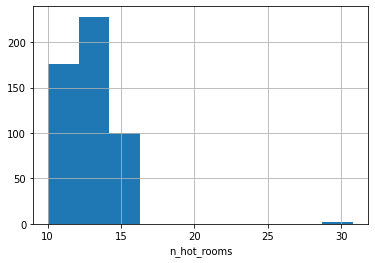

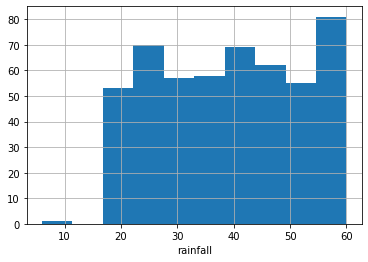

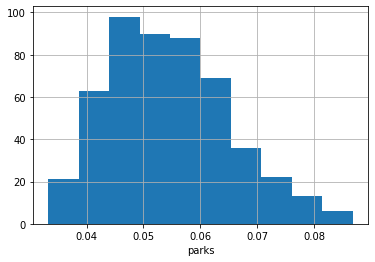

In [21]:
for f in num:
    dataC = data_n.copy()
    data[f].hist()
    plt.xlabel(f)
    plt.show()

* crime_rate and n_hot_rooms are right skewed
* room_num has normal distribution
* age is left skewed
* dist1, dist2, dist3, dist4 are right skewed

# Transform Skewed Data


In [22]:
data['crime_rate'] = np.log(data['crime_rate']+1)

In [23]:
data['age'] = np.log(data['age']+1)

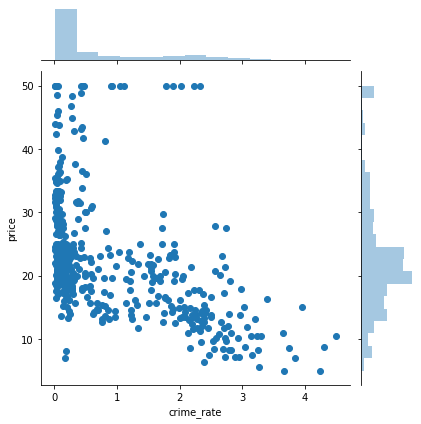

In [24]:
sns.jointplot(data['crime_rate'], data['price'])

# Transform and Remove Irrevelant Variables

* average distance feature

In [25]:
data['dist_avg'] = (data['dist1'] + data['dist2'] + data['dist3'] + data['dist4'])/4

In [26]:
data = data.drop(['dist1', 'dist2', 'dist3', 'dist4'], axis=1)

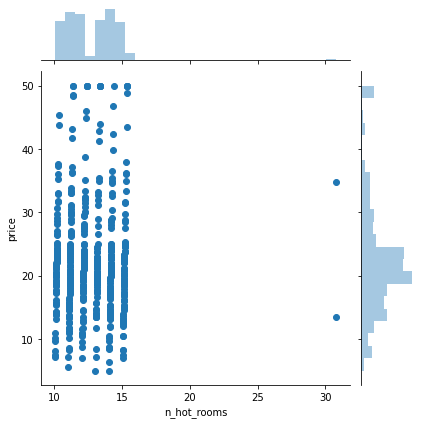

In [27]:
sns.jointplot(data['n_hot_rooms'], data['price'])

# Correlation Analysis

In [28]:
data.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,dist_avg
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.329752,0.505655,-0.740836,0.108880,0.017596,-0.047200,-0.391574,0.249289
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.474729,-0.390052,0.608970,-0.004089,0.067974,0.082151,0.638951,-0.586371
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.543015,-0.383248,0.603800,0.005799,-0.011354,0.055845,0.707635,-0.708022
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.646125,-0.188933,0.590879,-0.049553,0.013043,0.091956,0.915544,-0.769247
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.209602,0.355501,-0.613808,0.032009,0.003959,-0.064718,-0.282817,0.205241
age,-0.329752,0.474729,0.543015,0.646125,-0.209602,1.000000,-0.229537,0.527684,-0.019324,0.008120,0.056552,0.593415,-0.683020
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.229537,1.000000,-0.374044,-0.008056,-0.041572,-0.045928,-0.187004,0.232452
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.527684,-0.374044,1.000000,-0.066008,0.018377,0.061444,0.552310,-0.496967
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.019324,-0.008056,-0.066008,1.000000,-0.002743,0.058596,-0.071272,-0.027871
n_hot_rooms,0.017596,0.067974,-0.011354,0.013043,0.003959,0.008120,-0.041572,0.018377,-0.002743,1.000000,0.033457,0.031267,-0.023198


# Correlation Matrix

In [29]:
corr = data.corr()

<Figure size 1008x720 with 0 Axes>

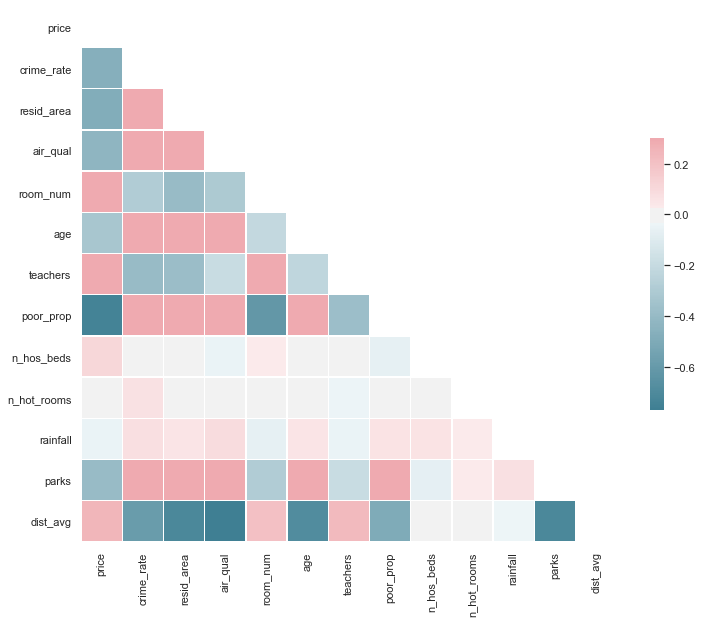

In [31]:
plt.figure(figsize=(14, 10))
sns.set(style='white')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})